# EP1: Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP

## Entrega do EP1

Preencha o nome dos 5 membros do seu grupo na tabela abaixo:

| Nome | NUSP |
|------|------|
| André Akira Hayashi | 9293011 |
| Mateus Agostinho dos Anjos | 9298191 |
| Renan Tiago dos Santos Silva | 9793606 |
| Rodrigo Toscano Ney | 11361219 |
| Bruno Picoli Romano | 6402851 |

In [1]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
import Pkg;
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("PGFPlotsX")
Pkg.build("PGFPlotsX")
Pkg.add("Plots")
Pkg.add("Query")
Pkg.add("StatsPlots")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


In [3]:
] st

Status `~/.julia/environments/v1.4/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.0
  [7073ff75] IJulia v1.21.2
  [8314cec4] PGFPlotsX v1.2.6
  [91a5bcdd] Plots v1.3.1
  [1a8c2f83] Query v0.12.2
  [03a91e81] SplitApplyCombine v1.0.0
  [f3b207a7] StatsPlots v0.14.6


Função que lê um arquivo <em>file</em> e retorna ele em linhas.

In [4]:
function read_file(file)
    f = open(file);
    return lines = readlines(f)
end

read_file (generic function with 1 method)

Função que lê as linhas de um arquivo e retorna ele em forma de um Dataframe.

In [5]:
using DataFrames
using Printf

function measure_mandelbrot(size, threads, start, lines)
    info = Vector(undef, 10)
    end_line = start + 9
    for n in start:end_line
        i = ((n-start) + 1)
        new = lstrip(lines[n])
        sp = split(new, " ")
        info[i] = sp[1]
    end
    return DataFrame(task_clock = parse(Float64,info[1]),
        context_switches = parse(Float64,info[2]),
        cpu_migrations = parse(Float64,info[3]),
        page_faults = parse(Int,info[4]),
        time_elapsed = parse(Float64,info[10]),
        size = size,
        threads = threads)
end

measure_mandelbrot (generic function with 1 method)

Função que gera um Dataframe dada o tamanho da imagem, o número de threads e as linhas do arquivo.

In [6]:
function make_Dataframe(size, threads, lines)
    results = DataFrame(task_clock = Float64[],
        context_switches = Float64[],
        cpu_migrations = Float64[],
        page_faults = Int[],
        time_elapsed = Float64[],
        size = Int[],
        threads = Int[])
    start = 4
    for s in size
        for t in threads
            append!(results,
                measure_mandelbrot(s, t, start, lines)) 
            start = start + 14
        end
    end
    return results
end

make_Dataframe (generic function with 1 method)

Função que salva um Dataframe em .csv com o nome <em>filename</em>.

In [7]:
using CSV

function save_csv_results(DataFrame, filename)
    fname = string(filename, ".csv")
    CSV.write(fname, DataFrame)
end

save_csv_results (generic function with 1 method)

## Exercício 1: Apresentação e Análise de Medições para o Programa Sequencial

Aqui é retirado a informação dos arquivos de log gerado pelo algoritmo sequencial de Mandelbrot, e é colocado em seus respectivos Dataframes. Altera-se os valores de <em>MAX_SIZE</em> e <em>MAX_NUM_THREAD</em> para alterar respectivamente o tamanho da imagem e o número de threads, ambos os valores são na base $2^x$.

In [8]:
MAX_SIZE = 13
MAX_NUM_THREAD = 0
s = [2 ^ x for x in 4:MAX_SIZE]
threads = [2 ^ x for x in 0:MAX_NUM_THREAD]
lines_seq_elephant = read_file("results/mandelbrot_seq/elephant.log")
results_seq_elephant = make_Dataframe(s, threads, lines_seq_elephant)

lines_seq_full = read_file("results/mandelbrot_seq/full.log")
results_seq_full = make_Dataframe(s, threads, lines_seq_full)

lines_seq_seahorse = read_file("results/mandelbrot_seq/seahorse.log")
results_seq_seahorse = make_Dataframe(s, threads, lines_seq_seahorse)

lines_seq_triple_spiral = read_file("results/mandelbrot_seq/triple_spiral.log")
results_seq_triple_spiral = make_Dataframe(s, threads, lines_seq_triple_spiral)

,task_clock,context_switches,cpu_migrations,page_faults,time_elapsed,size
,Float64,Float64,Float64,Int64,Float64,Int64
1,0.95307,0.0,0.0,55,0.0011716,16
2,2.49824,0.0,0.0,63,0.00272283,32
3,9.10203,0.0,0.0,93,0.00932294,64
4,34.2804,0.0,0.0,213,0.0345157,128
5,135.738,0.0,0.0,694,0.135993,256
6,547.005,1.0,0.0,2614,0.54729,512
7,2188.49,6.0,1.0,10294,2.19344,1024
8,9408.71,26.0,0.0,41014,9.43252,2048
9,34930.2,104.0,0.0,163894,35.0297,4096


In [9]:
MAX_SIZE = 13
MAX_NUM_THREAD = 0
s = [2 ^ x for x in 4:MAX_SIZE]
threads = [2 ^ x for x in 0:MAX_NUM_THREAD]
lines_seq_noio_elephant = read_file("results/mandelbrot_seq_noio/elephant.log")
results_seq_noio_elephant = make_Dataframe(s, threads, lines_seq_noio_elephant)

lines_seq_noio_full = read_file("results/mandelbrot_seq_noio/full.log")
results_seq_noio_full = make_Dataframe(s, threads, lines_seq_noio_full)

lines_seq_noio_seahorse = read_file("results/mandelbrot_seq_noio/seahorse.log")
results_seq_noio_seahorse = make_Dataframe(s, threads, lines_seq_noio_seahorse)

lines_seq_noio_triple_spiral = read_file("results/mandelbrot_seq_noio/triple_spiral.log")
results_seq_noio_triple_spiral = make_Dataframe(s, threads, lines_seq_noio_triple_spiral)

,task_clock,context_switches,cpu_migrations,page_faults,time_elapsed,size
,Float64,Float64,Float64,Int64,Float64,Int64
1,0.794501,0.0,0.0,49,0.00108158,16
2,2.45913,0.0,0.0,49,0.00278158,32
3,8.69118,0.0,0.0,49,0.008992,64
4,33.2259,0.0,0.0,49,0.0335187,128
5,131.869,0.0,0.0,49,0.13222,256
6,526.521,1.0,0.0,49,0.526884,512
7,2108.36,2.0,0.0,49,2.10867,1024
8,8421.53,6.0,0.0,49,8.42197,2048
9,33584.6,11.0,0.0,49,33.5852,4096


In [10]:
all_seq = vcat(results_seq_elephant, results_seq_full, results_seq_seahorse, results_seq_triple_spiral, 
    results_seq_noio_elephant, results_seq_noio_full, results_seq_noio_seahorse, results_seq_noio_triple_spiral)

,task_clock,context_switches,cpu_migrations,page_faults,time_elapsed,size
,Float64,Float64,Float64,Int64,Float64,Int64
1,0.882543,0.0,0.0,55,0.00116748,16
2,2.32901,0.0,0.0,63,0.00254952,32
3,7.66984,0.0,0.0,93,0.00789863,64
4,28.7302,0.0,0.0,213,0.0289674,128
5,113.322,0.0,0.0,694,0.11357,256
6,455.75,1.0,0.0,2613,0.456028,512
7,1824.51,6.0,1.0,10294,1.82982,1024
8,7297.04,26.0,0.0,41014,7.32357,2048
9,29062.2,103.0,1.0,163894,29.1646,4096


In [11]:
using Plots
pgfplotsx()

function plot_results_size(x, y, x_label, y_label, series_label; yerror = [], max_size_power)      
    if yerror != []
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2 ^ x for x in 4:max_size_power],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    else
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2 ^ x for x in 4:max_size_power],
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    end
    
    return p
end

function plot_results_thread(x, y, x_label, y_label, series_label; yerror = [], max_thread_power = 1)      
    if yerror != []
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_thread_power],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    else
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_thread_power],
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    end
    
    return p
end

plot_results_thread (generic function with 1 method)

## Gráficos Sequencial

### Tempo x Tamanho

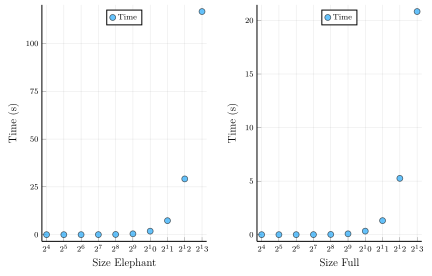

In [12]:
p1 = plot_results_size(results_seq_elephant.size,
    results_seq_elephant.time_elapsed,
    "Size Elephant",
    "Time (s)",
    "Time",
    max_size_power = 13)
p2 = plot_results_size(results_seq_full.size,
    results_seq_full.time_elapsed,
    "Size Full",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p1, p2)

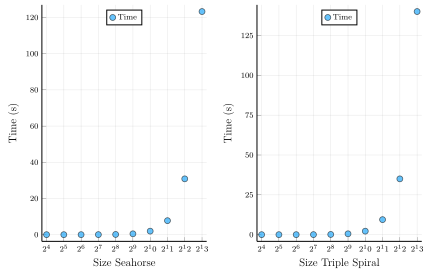

In [13]:
p3 = plot_results_size(results_seq_seahorse.size,
    results_seq_seahorse.time_elapsed,
    "Size Seahorse",
    "Time (s)",
    "Time",
    max_size_power = 13)
p4 = plot_results_size(results_seq_triple_spiral.size,
    results_seq_triple_spiral.time_elapsed,
    "Size Triple Spiral",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p3, p4)

### Tempo x Tamanho (Sem I/O)

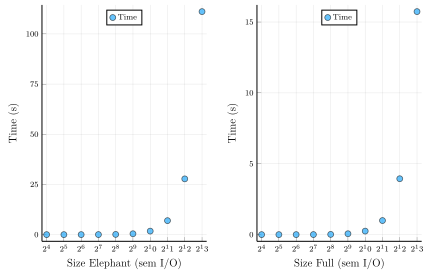

In [14]:
p1 = plot_results_size(results_seq_noio_elephant.size,
    results_seq_noio_elephant.time_elapsed,
    "Size Elephant (sem I/O)",
    "Time (s)",
    "Time",
    max_size_power = 13)
p2 = plot_results_size(results_seq_noio_full.size,
    results_seq_noio_full.time_elapsed,
    "Size Full (sem I/O)",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p1, p2)

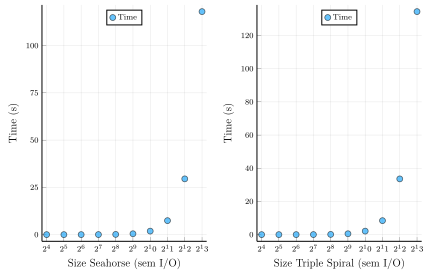

In [15]:
p3 = plot_results_size(results_seq_noio_seahorse.size,
    results_seq_noio_seahorse.time_elapsed,
    "Size Seahorse (sem I/O)",
    "Time (s)",
    "Time",
    max_size_power = 13)
p4 = plot_results_size(results_seq_noio_triple_spiral.size,
    results_seq_noio_triple_spiral.time_elapsed,
    "Size Triple Spiral (sem I/O)",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p3, p4)

#### Análises

Observando os gráficos gerados acima estão todos variando de acordo com o tamanho da imagem gerada e 
pelo tempo de execução. 

Pode-se observar que ambos os casos com as operações de I/O e sem, o tempo de execução aumenta com o tamanho da imagem, isso é o esperado, já que para calcular o Mandelbrot existem três <em>for's</em> sendo que dois deles utilizam o tamanho x e y da imagem, portanto ao aumentar o tamanho dela consequentemente aumentará o tempo de execução.

Em relação às regiões do Conjunto de Mandelbrot, as regiões em ordem de menor tempo de execução é o <em>Full</em>, <em>Elephant</em>, <em>Seahorse</em> e <em>Triple Spiral</em>, sendo que essas variações são mais visíveis com tamanhos grandes como, $2^{12}$ e $2^{13}$. Como a diferença para calcular o Mandelbrot em diferentes regiões são as variáveis <em>c_x_min</em>, <em>c_x_max</em>, <em>c_y_min</em> e <em>c_y_max</em>, que são utilizados para calcular o tamanho da altura ((c_y_max - c_y_min) / i_y_max) e largura ((c_x_max - c_x_min) / image_size) dos pixels. Sendo que um dos três <em>for's</em> da explicação anterior, utiliza esse tamanho como uma de suas condições, portanto quanto maior for o tamanho da altura e/ou da largura, menor será o tempo de execução, já que haverá menos loops.

Ao comparar os tempos de execuções com as operações de I/O e alocação de memória e sem, em relação a todas as regiões do Conjunto de Mandelbrot houve uma diminuição em todos os tempos, que são mais perceptíveis em tamanhos grandes de imagem ($2^{12}$ e $2^{13}$). Isso é o esperado, já que sem essas operações, não é mais necessário realizar as alocações de memória e nem a impressão da imagem gerada.

## Exercício 2: Apresentação e Análise de Medições para o Programa em Pthreads

Funções para calcular a média e o intervalo de confiança, de acordo com o número de threads e o tamanho da imagem.

In [16]:
using DataFrames, Query, StatsPlots, Statistics
function parse_results_threads(results)
    parsed_results = results |>
                    @groupby(_.threads) |>
                    @map({threads = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

function parse_results_size(results)
    parsed_results = results |>
                    @groupby(_.size) |>
                    @map({size = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

parse_results_size (generic function with 1 method)

Aqui é retirado a informação dos arquivos de log gerado pelo algoritmo pthreads de Mandelbrot, e é colocado em seus respectivos Dataframes. Altera-se os valores de <em>MAX_SIZE</em> e <em>MAX_NUM_THREAD</em> para alterar respectivamente o tamanho da imagem e o número de threads, ambos os valores são na base $2^x$.

In [17]:
MAX_SIZE = 13
MAX_NUM_THREAD = 8

s = [2 ^ x for x in 4:MAX_SIZE]
threads = [x for x in 1:MAX_NUM_THREAD]

lines_pth_elephant = read_file("results/mandelbrot_pth/elephant.log")
results_pth_elephant = make_Dataframe(s, threads, lines_pth_elephant)
parsed_threads_pth_elephant = (parse_results_threads(results_pth_elephant))
parsed_size_pth_elephant = (parse_results_size(results_pth_elephant))

lines_pth_full = read_file("results/mandelbrot_pth/full.log")
results_pth_full = make_Dataframe(s, threads, lines_pth_full)
parsed_threads_pth_full = (parse_results_threads(results_pth_full))
parsed_size_pth_full = (parse_results_size(results_pth_full))

lines_pth_seahorse = read_file("results/mandelbrot_pth/seahorse.log")
results_pth_seahorse = make_Dataframe(s, threads, lines_pth_seahorse)
parsed_threads_pth_seahorse = (parse_results_threads(results_pth_seahorse))
parsed_size_pth_seahorse = (parse_results_size(results_pth_seahorse))

lines_pth_triple_spiral = read_file("results/mandelbrot_pth/triple_spiral.log")
results_pth_triple_spiral = make_Dataframe(s, threads, lines_pth_triple_spiral)
parsed_threads_pth_triple_spiral = (parse_results_threads(results_pth_triple_spiral))
parsed_size_pth_triple_spiral = (parse_results_size(results_pth_triple_spiral))

,size,mean_time,ci_time
,Int64,Float64,Float64
1,16,0.00155888,0.000229933
2,32,0.00222805,0.000582869
3,64,0.00525026,0.00348009
4,128,0.0168872,0.0154491
5,256,0.0632965,0.0633287
6,512,0.246984,0.256811
7,1024,0.926832,1.07099
8,2048,3.91513,4.13502
9,4096,14.7457,17.077


In [18]:
all_pth = vcat(results_pth_elephant, results_pth_full, results_pth_seahorse, results_pth_triple_spiral)

,task_clock,context_switches,cpu_migrations,page_faults,time_elapsed,size
,Float64,Float64,Float64,Int64,Float64,Int64
1,1.01865,0.0,0.0,63,0.00147568,16
2,1.44838,2.0,0.0,77,0.00139674,16
3,1.62643,4.0,0.0,81,0.00138704,16
4,1.77652,5.0,1.0,83,0.0013877,16
5,1.89013,7.0,1.0,85,0.00144365,16
6,2.08727,8.0,1.0,86,0.00156567,16
7,2.28651,13.0,2.0,89,0.00168558,16
8,2.34334,11.0,4.0,90,0.00168069,16
9,2.29696,0.0,0.0,71,0.0025929,32


## Gráficos Pthreads

### Tempo x Tamanho

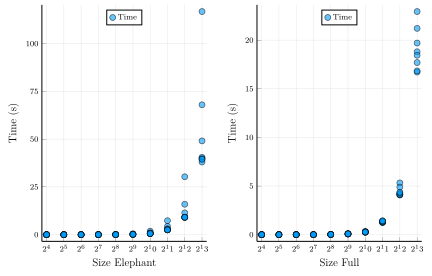

In [19]:
p1 = plot_results_size(results_pth_elephant.size,
    results_pth_elephant.time_elapsed,
    "Size Elephant",
    "Time (s)",
    "Time",
    max_size_power = 13)
p2 = plot_results_size(results_pth_full.size,
    results_pth_full.time_elapsed,
    "Size Full",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p1, p2)

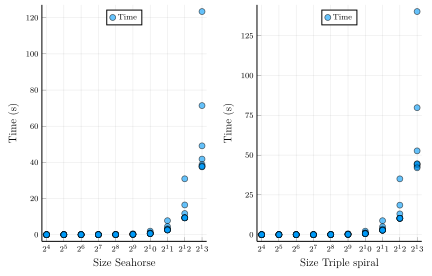

In [20]:
p3 = plot_results_size(results_pth_seahorse.size,
    results_pth_seahorse.time_elapsed,
    "Size Seahorse",
    "Time (s)",
    "Time",
    max_size_power = 13)
p4 = plot_results_size(results_pth_triple_spiral.size,
    results_pth_triple_spiral.time_elapsed,
    "Size Triple spiral",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p3, p4)

### Média do tempo + Intervalo de confiança x Tamanho

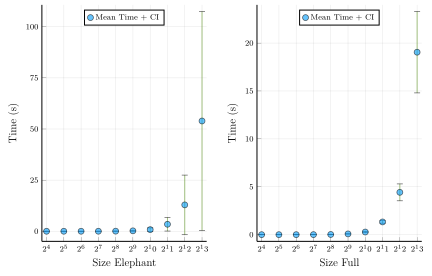

In [21]:
p1 = plot_results_size(parsed_size_pth_elephant.size,
    parsed_size_pth_elephant.mean_time,
    "Size Elephant",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_pth_elephant.ci_time,
    max_size_power = 13)
p2 = plot_results_size(parsed_size_pth_full.size,
    parsed_size_pth_full.mean_time,
    "Size Full",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_pth_full.ci_time,
    max_size_power = 13)
plot(p1, p2)

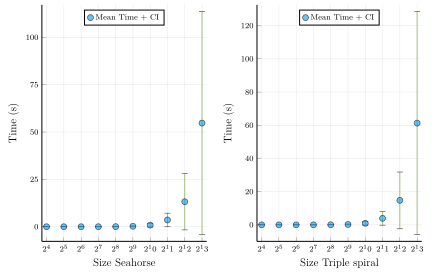

In [22]:
p3 = plot_results_size(parsed_size_pth_seahorse.size,
    parsed_size_pth_seahorse.mean_time,
    "Size Seahorse",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_pth_seahorse.ci_time,
    max_size_power = 13)
p4 = plot_results_size(parsed_size_pth_triple_spiral.size,
    parsed_size_pth_triple_spiral.mean_time,
    "Size Triple spiral",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_pth_triple_spiral.ci_time,
    max_size_power = 13)
plot(p3, p4)

#### Análises sobre o tamanho

Analisando os gráficos acima, que relaciona o tamanho da imagem gerada com o tempo de execução.

Com relação ao tamanho da entrada temos como no sequencial, um aumento do tempo conforme o tamanho da imagem aumenta, já que a execução do Mandelbrot depende proporcionalmente com o tamanho ao quadrado da imagem (2 <em>for's</em>). Porém nesse caso em que temos threads vemos que o intervalo de confiança aumenta de acordo com que o tamanho aumenta, isso ocorre pois conforme o tamanho da imagem aumenta, maior é o tempo execução e maior é a diferença que o número de threads causa. Portanto quanto maior for o número de threads menor é o tempo de execução, isso fica mais perceptivel em tamanhos grandes da imagem ($2^{12}$ e $2^{13}$).

### Tempo x Número de threads

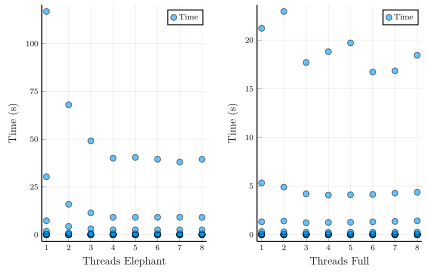

In [23]:
p1 = plot_results_thread(results_pth_elephant.threads,
    results_pth_elephant.time_elapsed,
    "Threads Elephant",
    "Time (s)",
    "Time",
    max_thread_power = 8)
p2 = plot_results_thread(results_pth_full.threads,
    results_pth_full.time_elapsed,
    "Threads Full",
    "Time (s)",
    "Time",
    max_thread_power = 8)
plot(p1, p2)

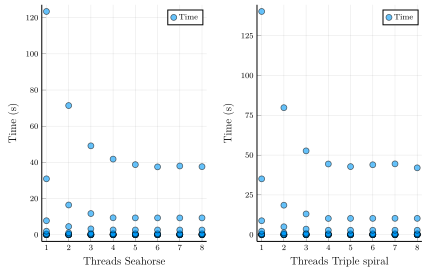

In [24]:
p3 = plot_results_thread(results_pth_seahorse.threads,
    results_pth_seahorse.time_elapsed,
    "Threads Seahorse",
    "Time (s)",
    "Time",
    max_thread_power = 8)
p4 = plot_results_thread(results_pth_triple_spiral.threads,
    results_pth_triple_spiral.time_elapsed,
    "Threads Triple spiral",
    "Time (s)",
    "Time",
    max_thread_power = 8)
plot(p3, p4)

### Média do tempo + Intervalo de confiança x Número de threads

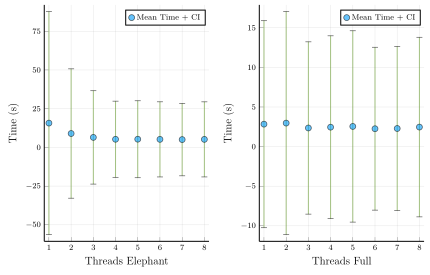

In [25]:
p1 = plot_results_thread(parsed_threads_pth_elephant.threads,
    parsed_threads_pth_elephant.mean_time,
    "Threads Elephant",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_elephant.ci_time,
    max_thread_power = 8)
p2 = plot_results_thread(parsed_threads_pth_full.threads,
    parsed_threads_pth_full.mean_time,
    "Threads Full",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_full.ci_time,
    max_thread_power = 8)
plot(p1, p2)

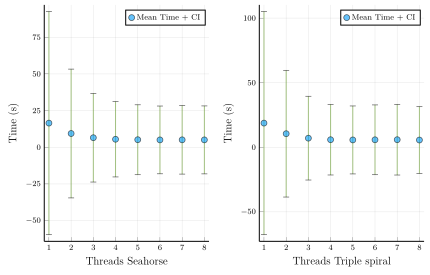

In [26]:
p3 = plot_results_thread(parsed_threads_pth_seahorse.threads,
    parsed_threads_pth_seahorse.mean_time,
    "Threads Seahorse",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_seahorse.ci_time,
    max_thread_power = 8)
p4 = plot_results_thread(parsed_threads_pth_triple_spiral.threads,
    parsed_threads_pth_triple_spiral.mean_time,
    "Threads Triple spiral",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_triple_spiral.ci_time,
    max_thread_power = 8)
plot(p3, p4)

#### Análises sobre o número de threads e regiões do Conjunto de Mandelbrot

Analisando os gráficos acima, que relaciona a quantidade de threads com o tempo de execução.

Com relação ao número de threads, há uma diminuição no tempo de execução conforme o número de threads aumenta, porém após 4 threads, com exceção da região <em>Full</em>, em que ocorre um comportamento diferente após 3 threads, a diferença tanto nos tempos de cada tamanho quanto em sua média e intervalo de confiança, se mantém praticamente iguais. Isso ocorre, pois esse foi o limite máximo em que mais threads gerariam mais performance e passou a ter threads brigando por recursos não existentes atrasando o processsamento.
Os casos que utilizam apenas uma thread são os que possuem maior intervalo de confiança, pois é o mesmo que executar o código sequencialmente, e como vimos nas análises do caso sequencial vimos que a diferença de tempo de execução entre tamanhos pequenos e grandes de imagem variam muito causando uma grande discrepância entre os  intervalos.

O que ocorreu anteriormente com o número de threads e com o tamanho da imagem ocorre também em relação às regiões do Conjunto de Mandelbrot, sendo que dependendo das variáveis <em>c_x_min</em>, <em>c_x_max</em>, <em>c_y_min</em> e <em>c_y_max</em>, que são utilizados para calcular o tamanho da altura e largura dos pixels, sendo que o tempo de execução aumenta quando as dimensões dos pixels diminuem.

## Exercício 3: Apresentação e Análise de Medições para o Programa em OpenMP

Aqui é retirado a informação dos arquivos de log gerado pelo algoritmo sequencial de Mandelbrot, e é colocado em seus respectivos Dataframes. Altera-se os valores de <em>MAX_SIZE</em> e <em>MAX_NUM_THREAD</em> para alterar respectivamente o tamanho da imagem e o número de threads, ambos os valores são na base $2^x$.

In [27]:
MAX_SIZE = 13
MAX_NUM_THREAD = 8

s = [2 ^ x for x in 4:MAX_SIZE]
threads = [x for x in 1:MAX_NUM_THREAD]

lines_omp_elephant = read_file("results/mandelbrot_omp/elephant.log")
results_omp_elephant = make_Dataframe(s, threads, lines_omp_elephant)
parsed_threads_omp_elephant = (parse_results_threads(results_omp_elephant))
parsed_size_omp_elephant = (parse_results_size(results_omp_elephant))

lines_omp_full = read_file("results/mandelbrot_omp/full.log")
results_omp_full = make_Dataframe(s, threads, lines_omp_full)
parsed_threads_omp_full = (parse_results_threads(results_omp_full))
parsed_size_omp_full = (parse_results_size(results_omp_full))

lines_omp_seahorse = read_file("results/mandelbrot_omp/seahorse.log")
results_omp_seahorse = make_Dataframe(s, threads, lines_omp_seahorse)
parsed_threads_omp_seahorse = (parse_results_threads(results_omp_seahorse))
parsed_size_omp_seahorse = (parse_results_size(results_omp_seahorse))

lines_omp_triple_spiral = read_file("results/mandelbrot_omp/triple_spiral.log")
results_omp_triple_spiral = make_Dataframe(s, threads, lines_omp_triple_spiral)
parsed_threads_omp_triple_spiral = (parse_results_threads(results_omp_triple_spiral))
parsed_size_omp_triple_spiral = (parse_results_size(results_omp_triple_spiral))

,size,mean_time,ci_time
,Int64,Float64,Float64
1,16,0.00134993,0.000379323
2,32,0.00217251,0.00110044
3,64,0.00480771,0.00391577
4,128,0.0154229,0.0164689
5,256,0.0587155,0.0670552
6,512,0.231907,0.286636
7,1024,0.912301,1.09941
8,2048,3.64322,4.37439
9,4096,14.5086,17.5129


In [28]:
all_omp = vcat(results_omp_elephant, results_omp_full, results_omp_seahorse, results_omp_triple_spiral)

,task_clock,context_switches,cpu_migrations,page_faults,time_elapsed,size
,Float64,Float64,Float64,Int64,Float64,Int64
1,0.985058,0.0,0.0,74,0.00118525,16
2,1.23414,0.0,0.0,78,0.00109108,16
3,1.50566,0.0,0.0,80,0.00110161,16
4,3.41761,0.0,0.0,81,0.00164411,16
5,1.45972,12.0,3.0,83,0.00120063,16
6,1.53927,16.0,5.0,86,0.00126504,16
7,1.5841,21.0,6.0,88,0.00127423,16
8,1.69778,25.0,7.0,90,0.00136634,16
9,2.32961,0.0,0.0,81,0.00253589,32


## Gráficos OpenMP

### Tempo x Tamanho

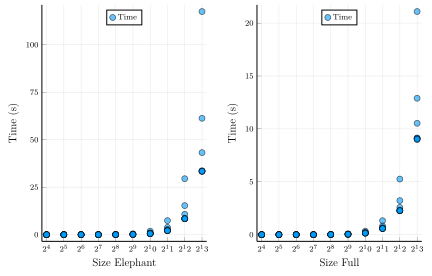

In [29]:
p1 = plot_results_size(results_omp_elephant.size,
    results_omp_elephant.time_elapsed,
    "Size Elephant",
    "Time (s)",
    "Time",
    max_size_power = 13)
p2 = plot_results_size(results_omp_full.size,
    results_omp_full.time_elapsed,
    "Size Full",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p1, p2)

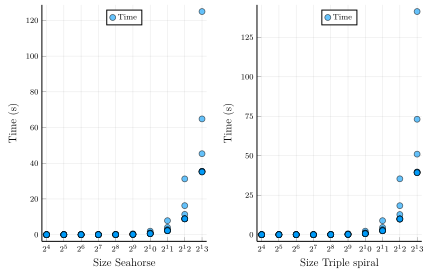

In [30]:
p3 = plot_results_size(results_omp_seahorse.size,
    results_omp_seahorse.time_elapsed,
    "Size Seahorse",
    "Time (s)",
    "Time",
    max_size_power = 13)
p4 = plot_results_size(results_omp_triple_spiral.size,
    results_omp_triple_spiral.time_elapsed,
    "Size Triple spiral",
    "Time (s)",
    "Time",
    max_size_power = 13)
plot(p3, p4)

### Média do tempo + Intervalo de confiança x Tamanho

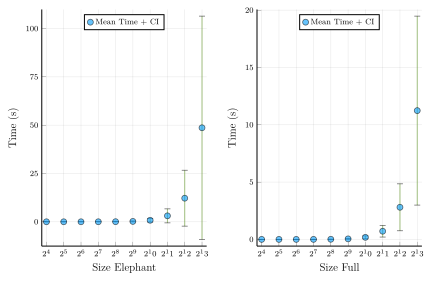

In [31]:
p1 = plot_results_size(parsed_size_omp_elephant.size,
    parsed_size_omp_elephant.mean_time,
    "Size Elephant",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_omp_elephant.ci_time,
    max_size_power = 13)
p2 = plot_results_size(parsed_size_omp_full.size,
    parsed_size_omp_full.mean_time,
    "Size Full",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_omp_full.ci_time,
    max_size_power = 13)
plot(p1, p2)

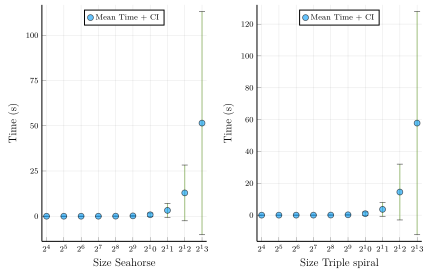

In [32]:
p3 = plot_results_size(parsed_size_omp_seahorse.size,
    parsed_size_omp_seahorse.mean_time,
    "Size Seahorse",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_omp_seahorse.ci_time,
    max_size_power = 13)
p4 = plot_results_size(parsed_size_omp_triple_spiral.size,
    parsed_size_omp_triple_spiral.mean_time,
    "Size Triple spiral",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_size_omp_triple_spiral.ci_time,
    max_size_power = 13)
plot(p3, p4)

#### Análises sobre o tamanho

Analisando os gráficos acima, que relaciona o tamanho da imagem gerada com o tempo de execução.

Com relação ao tamanho da entrada temos o mesmo comportamento do que foi visto nas análises do Pthread, as únicas diferenças visíveis são os diferentes intervalos de confiança que pode-se observar em tamanhos grandes de imagem ($2^{12}$ e $2^{13}$). Portanto o tempo de execução aumenta conforme aumenta o tamanho da imagem e o intervalo de confiança.

### Tempo x Número de threads

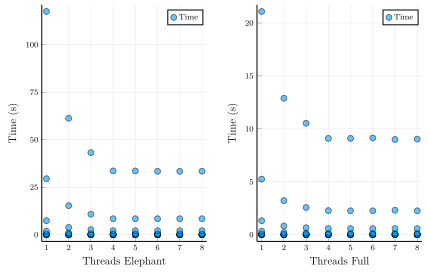

In [33]:
p1 = plot_results_thread(results_omp_elephant.threads,
    results_omp_elephant.time_elapsed,
    "Threads Elephant",
    "Time (s)",
    "Time",
    max_thread_power = 8)
p2 = plot_results_thread(results_omp_full.threads,
    results_omp_full.time_elapsed,
    "Threads Full",
    "Time (s)",
    "Time",
    max_thread_power = 8)
plot(p1, p2)

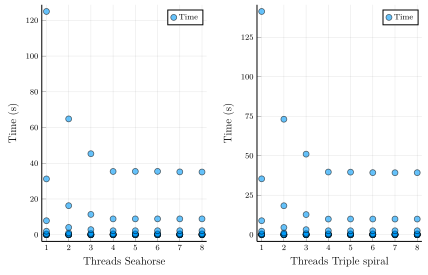

In [34]:
p3 = plot_results_thread(results_omp_seahorse.threads,
    results_omp_seahorse.time_elapsed,
    "Threads Seahorse",
    "Time (s)",
    "Time",
    max_thread_power = 8)
p4 = plot_results_thread(results_omp_triple_spiral.threads,
    results_omp_triple_spiral.time_elapsed,
    "Threads Triple spiral",
    "Time (s)",
    "Time",
    max_thread_power = 8)
plot(p3, p4)

### Média do tempo + Intervalo de confiança x Número de threads

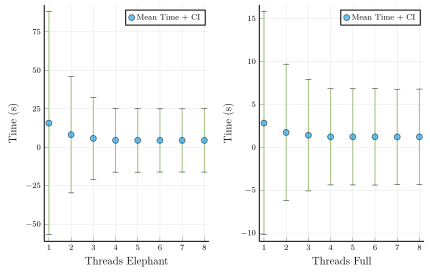

In [35]:
p1 = plot_results_thread(parsed_threads_omp_elephant.threads,
    parsed_threads_omp_elephant.mean_time,
    "Threads Elephant",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_elephant.ci_time,
    max_thread_power = 8)
p2 = plot_results_thread(parsed_threads_omp_full.threads,
    parsed_threads_omp_full.mean_time,
    "Threads Full",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_full.ci_time,
    max_thread_power = 8)
plot(p1, p2)

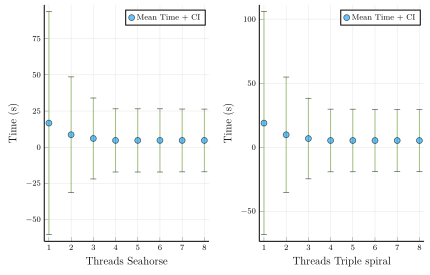

In [36]:
p3 = plot_results_thread(parsed_threads_omp_seahorse.threads,
    parsed_threads_omp_seahorse.mean_time,
    "Threads Seahorse",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_seahorse.ci_time,
    max_thread_power = 8)
p4 = plot_results_thread(parsed_threads_omp_triple_spiral.threads,
    parsed_threads_omp_triple_spiral.mean_time,
    "Threads Triple spiral",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_triple_spiral.ci_time,
    max_thread_power = 8)
plot(p3, p4)

#### Análises sobre o número de threads e regiões do Conjunto de Mandelbrot

Analisando os gráficos acima, que relaciona a quantidade de threads com o tempo de execução.

Com relação ao número de threads e às regiões do Conjunto de Mandelbrot, temos o mesmo comportamento que foi visto nas análises do Pthread, porém no OpenMP a região <em>Full</em> se comporta de forma parecida em relação às outras, ou seja, após 4 threads o intervalo de confiança e sua média são mantidas.

In [37]:
all_result = vcat(all_seq, all_pth, all_omp)
save_csv_results(all_result, "results")

"results.csv"